In [ ]:
from googleapiclient.discovery import build

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
API_KEY = 'YOUR-API-KEY'

youtube = build('youtube', 'v3', developerKey=API_KEY)

channel_usernames = ['zeemusiccompany',
                     'SETIndia',
                     'yrf',
                     'colorstv',
                     'tseries']

channel_ids = [None] * len(channel_usernames)

In [ ]:
for i, username in enumerate(channel_usernames):
    request = youtube.channels().list(
        part='id',
        forUsername=username
    )
    response = request.execute()
    if response.get('items'):
        channel_id = response['items'][0]['id']
        channel_ids[i] = channel_id

In [ ]:
print(API_KEY)
print(channel_ids)

Function to get channel statistics:

In [ ]:
def get_channel_stats(youtube, channel_ids):
  request = youtube.channels().list(
    part='snippet, contentDetails,statistics',
    id=','.join(channel_ids)
  )
  response = request.execute()

  all_data= []

  for i in range(len(channel_ids)):
    data= dict(channel_name= response['items'][i]['snippet']['title'],
               subscribers= response['items'][i]['statistics']['subscriberCount'],
               views= response['items'][i]['statistics']['viewCount'],
               total_videos= response['items'][i]['statistics']['videoCount'],
               playlist_id= response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
    all_data.append(data)

  return all_data

In [ ]:
channel_statistics= get_channel_stats(youtube, channel_ids)

In [ ]:
channel_data= pd.DataFrame(channel_statistics)

In [ ]:
channel_data

,channel_name,subscribers,views,total_videos,playlist_id
0,SET India,173000000,164805803293,139076,UUpEhnqL0y41EpW2TvWAHD7Q
1,Colors TV,73000000,71003824308,151977,UU55IWqFLDH1Xp7iu1_xknRA
2,Zee Music Company,108000000,66892754451,11234,UUFFbwnve3yF62-tVXkTyHqg
3,T-Series,267000000,257360883449,21131,UUq-Fj5jknLsUf-MWSy4_brA
4,YRF,60100000,41143054089,4098,UUbTLwN10NoCU4WDzLf1JMOA


In [ ]:
channel_data['subscribers']=pd.to_numeric(channel_data['subscribers'])
channel_data['views']=pd.to_numeric(channel_data['views'])
channel_data['total_videos']=pd.to_numeric(channel_data['total_videos'])

channel_data.dtypes

channel_name    object
subscribers      int64
views            int64
total_videos     int64
playlist_id     object
dtype: object

<ipython-input-62-4b815ca5c2ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x='channel_name', y='subscribers', data=channel_data,palette= custom_palette)


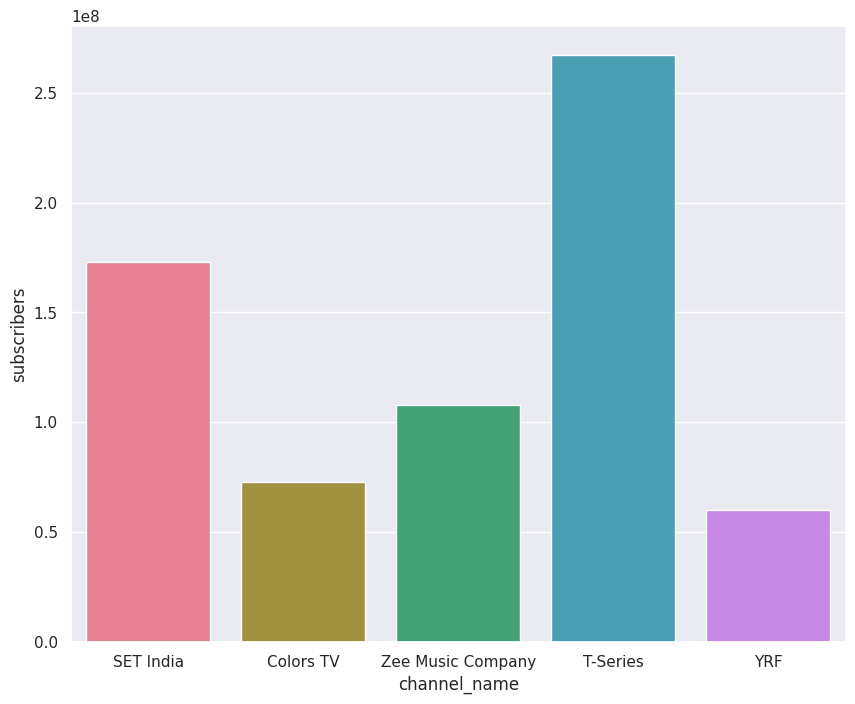

In [ ]:
custom_palette = sns.color_palette("husl", len(channel_data['channel_name'].unique()))

sns.set(rc={'figure.figsize':(10,8)})
ax= sns.barplot(x='channel_name', y='subscribers', data=channel_data,palette= custom_palette)

<ipython-input-63-bbf8aec614fe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x='channel_name', y='views', data=channel_data,palette= custom_palette)


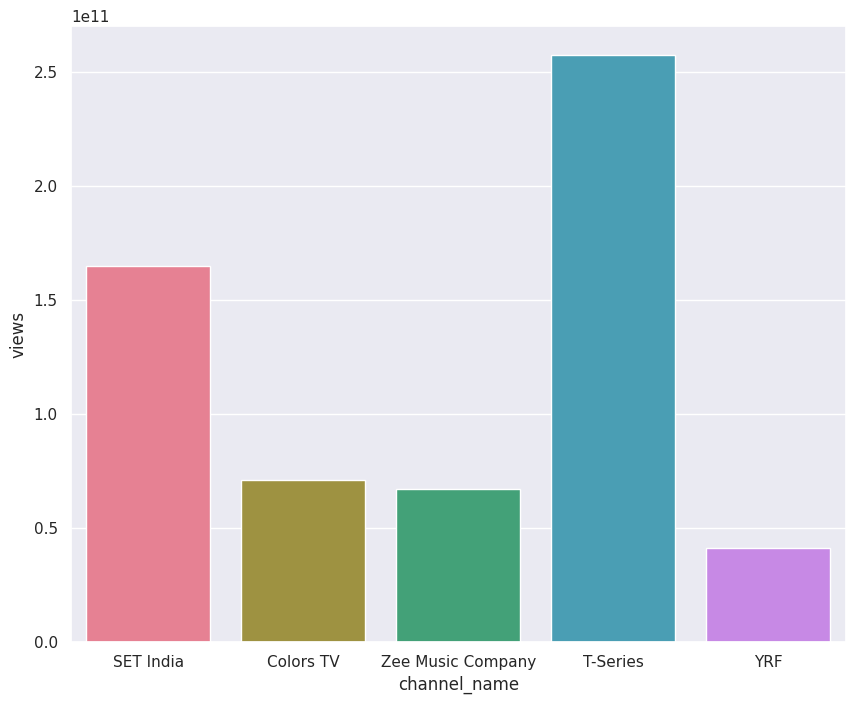

In [ ]:
ax= sns.barplot(x='channel_name', y='views', data=channel_data,palette= custom_palette)

<ipython-input-64-2d40ccae3f90>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x='channel_name', y='total_videos', data=channel_data,palette= custom_palette)


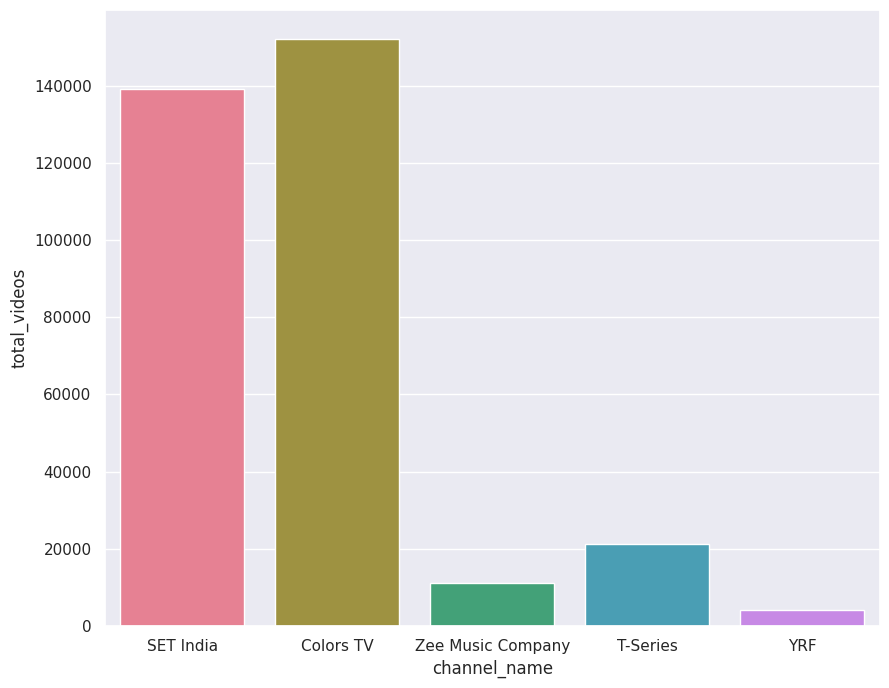

In [ ]:
ax= sns.barplot(x='channel_name', y='total_videos', data=channel_data,palette= custom_palette)

Fuction to get video IDS

In [ ]:
channel_data

,channel_name,subscribers,views,total_videos,playlist_id
0,SET India,173000000,164805803293,139076,UUpEhnqL0y41EpW2TvWAHD7Q
1,Colors TV,73000000,71003824308,151977,UU55IWqFLDH1Xp7iu1_xknRA
2,Zee Music Company,108000000,66892754451,11234,UUFFbwnve3yF62-tVXkTyHqg
3,T-Series,267000000,257360883449,21131,UUq-Fj5jknLsUf-MWSy4_brA
4,YRF,60100000,41143054089,4098,UUbTLwN10NoCU4WDzLf1JMOA


In [ ]:
playlist_id= channel_data.loc[channel_data['channel_name']=='T-Series', 'playlist_id'].iloc[0]

In [ ]:
playlist_id

'UUq-Fj5jknLsUf-MWSy4_brA'

In [ ]:
def get_video_ids(youtube, playlist_id):
  request = youtube.playlistItems().list(
      part='contentDetails',
      playlistId= playlist_id,
      maxResults=50)    # max value of maxResults is only 50.
  response= request.execute()

  video_ids=[]
  for i in range(len(response['items'])):
    video_ids.append(response['items'][i]['contentDetails']['videoId'])

  next_page_tkn= response.get('nextPageToken')
  more_pages= True

  while more_pages:
    if next_page_tkn is None:
      more_pages= False
    else:
      request= youtube.playlistItems().list(
          part= 'contentDetails',
          playlistId= playlist_id,
          maxResults=50,
          pageToken= next_page_tkn)
      response= request.execute()
      for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

      next_page_tkn= response.get('nextPageToken')

  return video_ids

In [ ]:
video_ids= get_video_ids(youtube, playlist_id)

In [ ]:
video_ids

['MjoAHNbMAdg',
 'i5pyo8wj7TQ',
 'aDy_1duS-CI',
 'XqivMWeGCQY',
 '8tvqbn4cVag',
 'uD_ExcEenTs',
 'iQwcr5sriO4',
 'Ek5aEQo8_ik',
 '6HWKir8y7v0',
 '0duyuwhRSuM',
 'NCIuR8tmQfM',
 'wVT0T5A_ehI',
 'psnYuD4M6zY',
 'jPgoh8L1aj0',
 'gLHWitWspkM',
 'vnQTFeW1B4U',
 '43idqJ_olT0',
 'CG3WYPbh3So',
 'sikF9HrqoZg',
 'dyrz8M7riz8',
 'aDwzt5CJErc',
 'ksFmfBY582w',
 '1BLuLw0rzXM',
 'ABlqmE1HVo8',
 'xcq1wCJCbMg',
 'NXQtO58nkW8',
 '6wyIXTRxZtg',
 'y7CYNqREdag',
 'YMO86vOXdxA',
 'KyrwwtoD06Q',
 'wf4PfoFM14A',
 'NIdxHqeQ8KM',
 'Tef5o8DNtS4',
 'uBfaA4kzuSs',
 'zM26qg59oT4',
 'YiCak27K6e4',
 'Y9XqnjKXgTs',
 '-fi3k4w2pQI',
 'S9y-C5oRzeM',
 '7R3MiWdTFws',
 'IYrMzw3Ejh8',
 'jnH_ItnFEcY',
 '_MQGh2Ey8H8',
 '7ymc4KmwUHo',
 'nPvpv_AUwhI',
 'mr90T-55pFs',
 '4JufRBHKF2o',
 'IFHyy8p2nYQ',
 'Go3Steo2fCw',
 'GRDtWZvWwDU',
 'oaE5o4XbnCM',
 'qeeAJ6VhwtI',
 'Gi3hD2ZArY4',
 'B95lzmVXHZ4',
 'MB4Kq0KZ1X4',
 'pKQd-R_eFXQ',
 'ZU9i2dGcrFQ',
 'N_QwE1wH7R8',
 'IaMMKBle6qc',
 '-zr7-brd3k0',
 'YJErvKIVdlU',
 '82xQ-A2SJYw',
 'Ww2Ddu

In [ ]:
len(video_ids)

20000

Function to get video details

In [ ]:
def get_video_details(youtube,video_ids):
  all_video_stats= []
  for i in range(0,len(video_ids),50):
    request= youtube.videos().list(
        part='snippet, statistics',
        #id=','.join(video_ids)      #max limit of passing youtube ids is 50
        id= ','.join(video_ids[i:i+50])
    )
    response= request.execute()

    for video in response['items']:
      video_stats= dict(title= video['snippet']['title'],
                        Published_date= video['snippet']['publishedAt'],
                        views= video['statistics']['viewCount'],
                        likes= video['statistics'].get('likeCount', 0),
                        dislikes= video['statistics'].get('dislikeCount', 0),  # Y
                        comments= video['statistics'].get('commentCount', 0)
                        )
      all_video_stats.append(video_stats)

  return all_video_stats

In [ ]:
video_details= get_video_details(youtube,video_ids)

In [ ]:
video_data= pd.DataFrame(video_details)

In [ ]:
video_data

,title,Published_date,views,likes,dislikes,comments
0,"SAVI (Dialogue): Anil Kapoor, Divya Khossla | ...",2024-06-09T11:00:59Z,1153,64,0,24
1,Zindagi Do Pal Ki (Lo-Fi): Hrithik Roshan | K....,2024-06-09T09:30:38Z,3429,361,0,51
2,"House of Lies❤️‍🔥🔥 | Ikka , Karan Aujla | Kani...",2024-06-09T07:49:48Z,8276,350,0,25
3,"SRIKANTH (Full Video Jukebox): RAJKUMMAR, ALAY...",2024-06-09T05:30:13Z,15436,403,0,125
4,CHAAR BOTAL VODKA CLUB DANCE MIX: YO YO HONEY ...,2024-06-08T15:14:41Z,115561,6649,0,649
...,...,...,...,...,...,...
19995,Roj Miliye Feat : Vigilante [Full Song] Roj Mi...,2011-05-17T01:13:59Z,25419,183,0,14
19996,Manzilein Kya Hai Raasta Kya Hai (Full Song): ...,2011-05-17T01:10:59Z,102545,3301,0,106
19997,Piya lagi Laganiya [Full Song] Laagi Lagan,2011-05-17T01:10:40Z,5912,57,0,7
19998,Inteha Aaj Ishq Ki Kardi [Full Song] Inteha,2011-05-17T01:10:19Z,30678,557,0,46


In [ ]:
video_data['Published_date']= pd.to_datetime(video_data['Published_date']).dt.date
video_data['views']= pd.to_numeric(video_data['views'])
video_data['likes']= pd.to_numeric(video_data['likes'])
video_data['dislikes']= pd.to_numeric(video_data['dislikes'])
video_data['comments']= pd.to_numeric(video_data['comments'])

In [ ]:
video_data

,title,Published_date,views,likes,dislikes,comments
0,"SAVI (Dialogue): Anil Kapoor, Divya Khossla | ...",2024-06-09,1153,64,0,24
1,Zindagi Do Pal Ki (Lo-Fi): Hrithik Roshan | K....,2024-06-09,3429,361,0,51
2,"House of Lies❤️‍🔥🔥 | Ikka , Karan Aujla | Kani...",2024-06-09,8276,350,0,25
3,"SRIKANTH (Full Video Jukebox): RAJKUMMAR, ALAY...",2024-06-09,15436,403,0,125
4,CHAAR BOTAL VODKA CLUB DANCE MIX: YO YO HONEY ...,2024-06-08,115561,6649,0,649
...,...,...,...,...,...,...
19995,Roj Miliye Feat : Vigilante [Full Song] Roj Mi...,2011-05-17,25419,183,0,14
19996,Manzilein Kya Hai Raasta Kya Hai (Full Song): ...,2011-05-17,102545,3301,0,106
19997,Piya lagi Laganiya [Full Song] Laagi Lagan,2011-05-17,5912,57,0,7
19998,Inteha Aaj Ishq Ki Kardi [Full Song] Inteha,2011-05-17,30678,557,0,46


In [ ]:
video_data.dislikes.unique()

array([0])

In [ ]:
top_10_videos= video_data.sort_values(by='views', ascending= False).head(10)

In [ ]:
top_10_videos

,title,Published_date,views,likes,dislikes,comments
8447,"Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...",2019-04-06,1593383488,13183455,0,360568
6138,"Lut Gaye (Full Song) Emraan Hashmi, Yukti | Ju...",2021-02-17,1398762482,11030318,0,342078
9412,DILBAR Lyrical | Satyameva Jayate |John Abraha...,2018-07-09,1309508438,5601931,0,188737
8821,"SIMMBA: Aankh Marey Lyrical | Ranveer Singh, S...",2018-12-11,1236529976,3571681,0,84809
12616,"Cham Cham Full Video | BAAGHI | Tiger Shroff, ...",2016-05-06,1226553777,4079166,0,94387
10824,Guru Randhawa: High Rated Gabru Official Song ...,2017-07-04,1212646773,6407959,0,419328
18559,Bum Bum Bole (Full Song) Film - Taare Zameen P...,2011-05-24,1095308050,2985787,0,67335
10071,Guru Randhawa: Lahore (Official Video) Bhushan...,2017-12-14,1089648479,6202864,0,314810
9900,Bom Diggy Diggy (VIDEO) | Zack Knight | Jasmi...,2018-02-08,1080262229,4757267,0,131271
7797,Full Song: KHAIRIYAT (BONUS TRACK) | CHHICHHOR...,2019-09-26,1029350866,7477909,0,260706


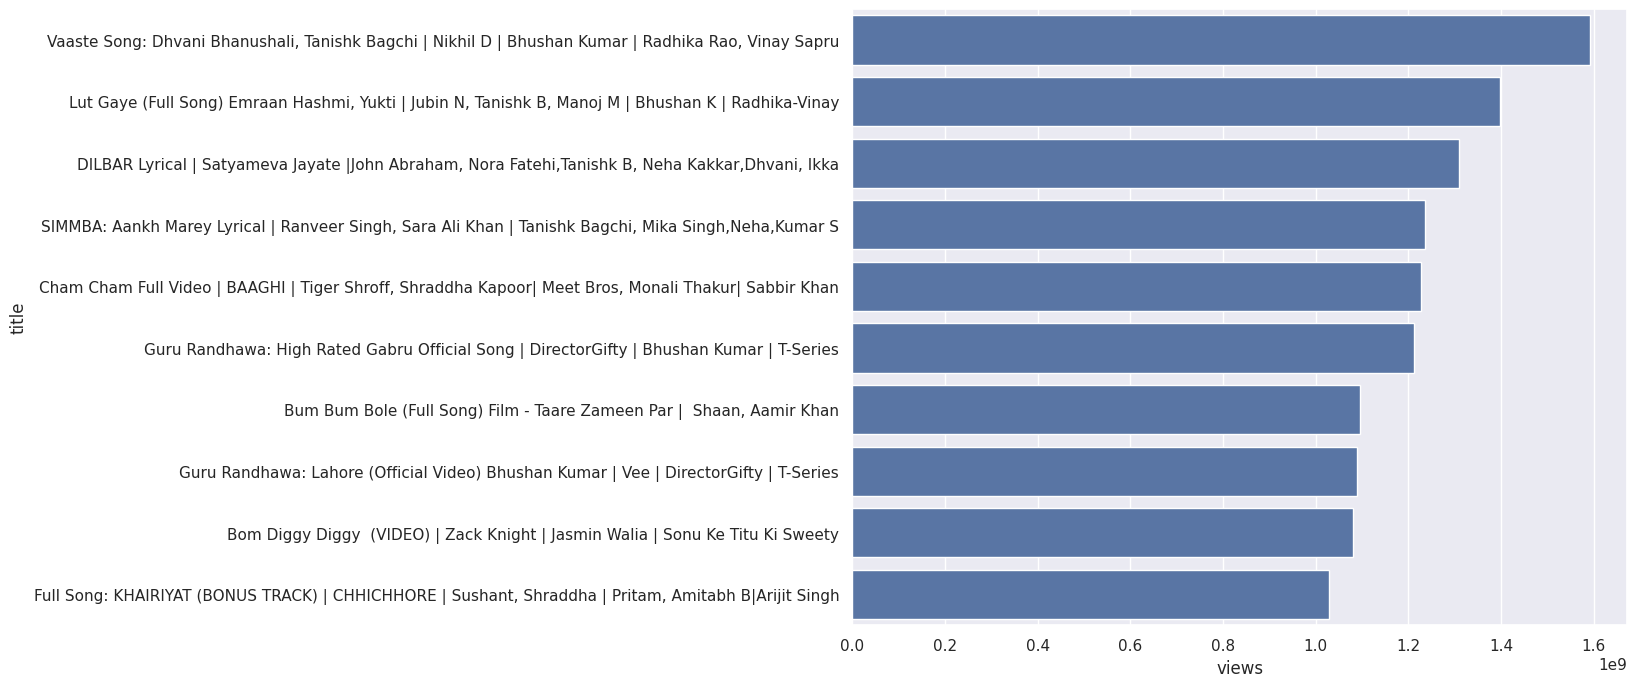

In [ ]:
ax1= sns.barplot(x='views', y='title', data= top_10_videos)

In [ ]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date'])

video_data['month'] = video_data['Published_date'].dt.strftime('%b')

In [ ]:
video_data

,title,Published_date,views,likes,dislikes,comments,month
0,"SAVI (Dialogue): Anil Kapoor, Divya Khossla | ...",2024-06-09,1153,64,0,24,Jun
1,Zindagi Do Pal Ki (Lo-Fi): Hrithik Roshan | K....,2024-06-09,3429,361,0,51,Jun
2,"House of Lies❤️‍🔥🔥 | Ikka , Karan Aujla | Kani...",2024-06-09,8276,350,0,25,Jun
3,"SRIKANTH (Full Video Jukebox): RAJKUMMAR, ALAY...",2024-06-09,15436,403,0,125,Jun
4,CHAAR BOTAL VODKA CLUB DANCE MIX: YO YO HONEY ...,2024-06-08,115561,6649,0,649,Jun
...,...,...,...,...,...,...,...
19995,Roj Miliye Feat : Vigilante [Full Song] Roj Mi...,2011-05-17,25419,183,0,14,May
19996,Manzilein Kya Hai Raasta Kya Hai (Full Song): ...,2011-05-17,102545,3301,0,106,May
19997,Piya lagi Laganiya [Full Song] Laagi Lagan,2011-05-17,5912,57,0,7,May
19998,Inteha Aaj Ishq Ki Kardi [Full Song] Inteha,2011-05-17,30678,557,0,46,May


In [ ]:
video_on_month= video_data.groupby('month', as_index= False).size()

In [ ]:
video_on_month

,month,size
0,Apr,1633
1,Aug,1416
2,Dec,1427
3,Feb,1549
4,Jan,1330
5,Jul,1478
6,Jun,1239
7,Mar,1543
8,May,4205
9,Nov,1351


In [ ]:
sort_order= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
video_on_month.index= pd.CategoricalIndex(video_on_month['month'], categories= sort_order, ordered= True)

In [ ]:
video_on_month= video_on_month.sort_index()

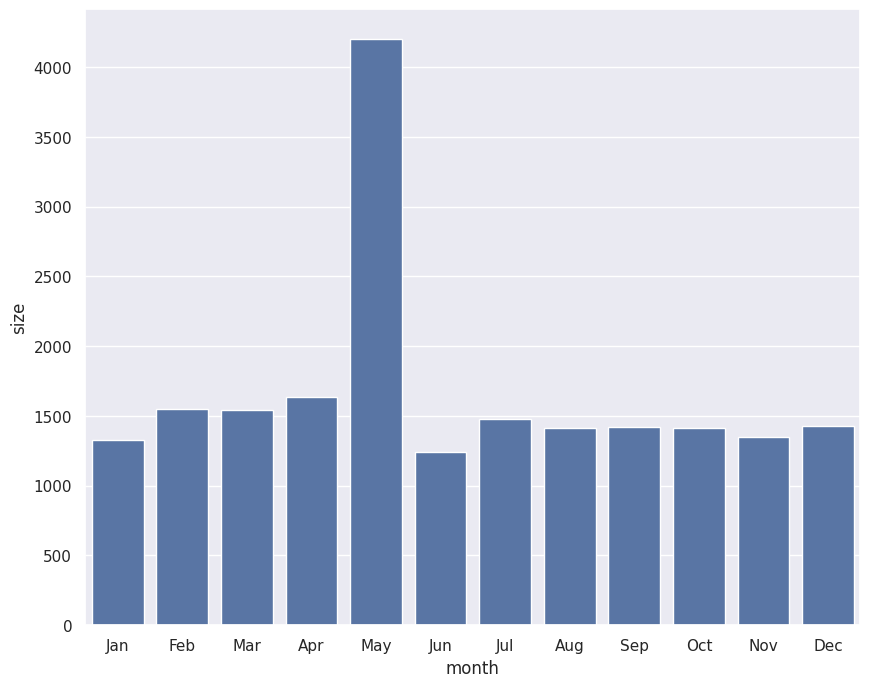

In [ ]:
ax2= sns.barplot(x='month', y='size', data= video_on_month)

In [ ]:
video_data.to_csv('video_details_of_TSeries.csv', index= False)